# Loading the dataset


In [10]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv("C:/Users/David/OneDrive/Desktop/LOCI/insurance.csv")

# Display the first few rows to understand the structure of the data
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Getting the EDA(Exploratory Data Analysis)

In [3]:
# Summary statistics for numerical attributes
summary_stats = df[['age', 'bmi', 'children', 'charges']].describe()
print(summary_stats)


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


# I wanna create the basic analysis

# Age Distribution by Gender (Bar Chart):


<Figure size 1000x600 with 0 Axes>

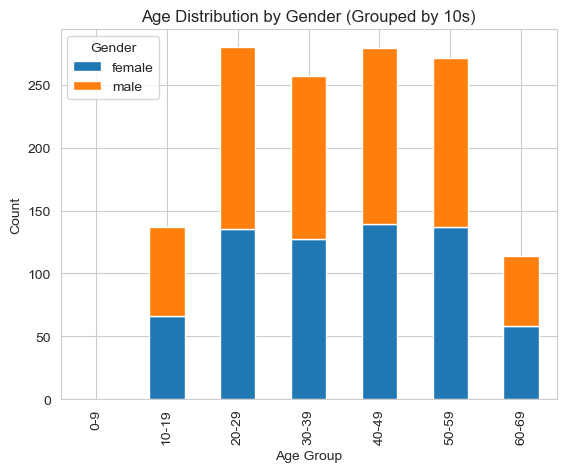

In [20]:
# Create age groups
age_bins = [10 * i for i in range(int(df['age'].max() / 10) + 2)]
age_labels = [f'{age}-{age + 9}' for age in age_bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True, right=False)

# Group ages by gender and age group, and count the occurrences
age_distribution_by_gender = df.groupby(['age_group', 'sex']).size().unstack()

# Plot the age distribution by gender
plt.figure(figsize=(10, 6))
age_distribution_by_gender.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution by Gender (Grouped by 10s)')
plt.legend(title='Gender')
plt.show()


# BMI Distribution by Gender (Bar Chart):

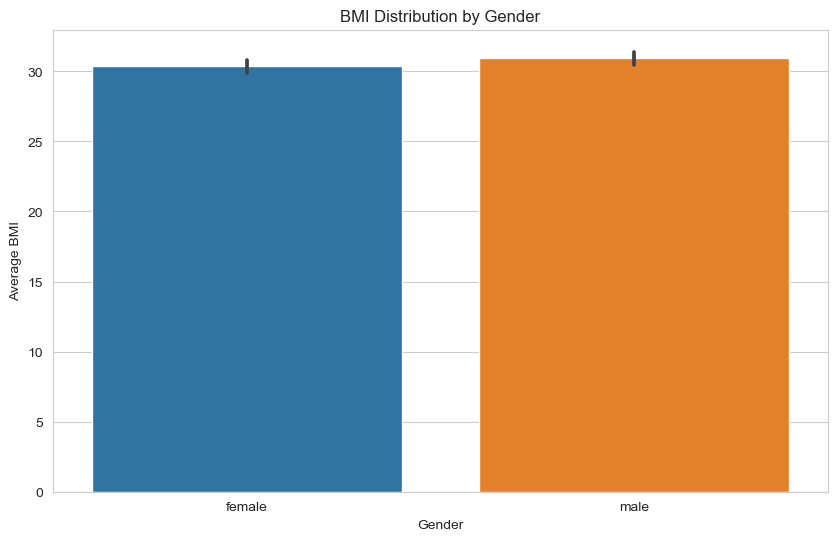

In [12]:

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sex', y='bmi')
plt.xlabel('Gender')
plt.ylabel('Average BMI')
plt.title('BMI Distribution by Gender')
plt.show()


# Insurance Charges by Age (Trend - Line Chart):

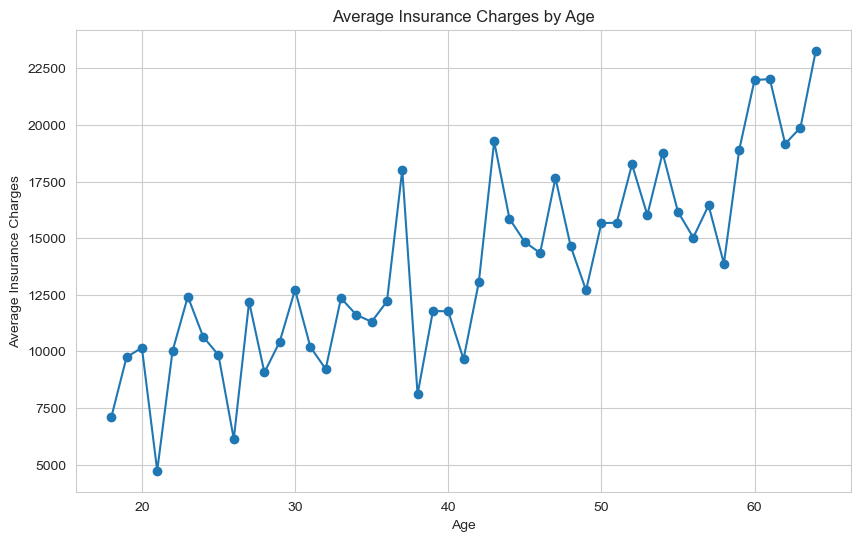

In [13]:
# Compute average insurance charges for each age
age_avg_charges = df.groupby('age')['charges'].mean()

plt.figure(figsize=(10, 6))
plt.plot(age_avg_charges.index, age_avg_charges.values, marker='o')
plt.xlabel('Age')
plt.ylabel('Average Insurance Charges')
plt.title('Average Insurance Charges by Age')
plt.grid(True)
plt.show()


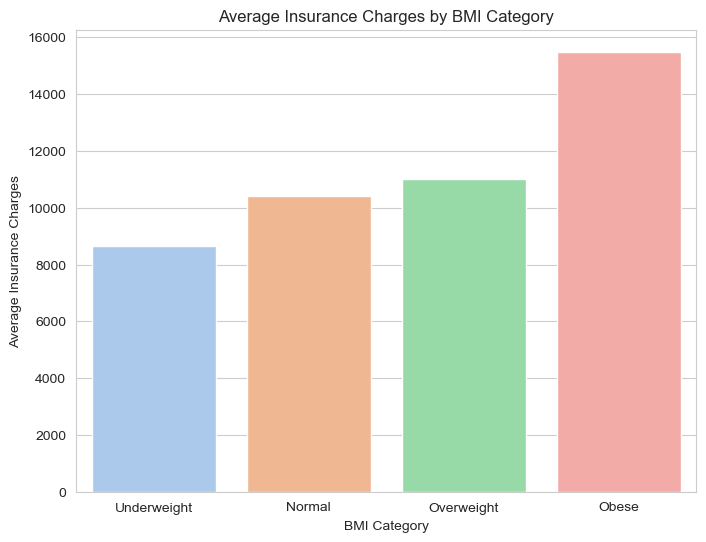

In [15]:


# . Insurance Charges by BMI Categories (Bar Chart)
# Define BMI categories
bmi_categories = ['Underweight', 'Normal', 'Overweight', 'Obese']
bmi_bins = [0, 18.5, 24.9, 29.9, 60]  # BMI categories: Underweight, Normal, Overweight, Obese
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_categories)

# Compute average insurance charges for each BMI category
bmi_avg_charges = df.groupby('bmi_category')['charges'].mean()

# Create a bar chart to visualize average insurance charges for each BMI category
plt.figure(figsize=(8, 6))
sns.barplot(x=bmi_avg_charges.index, y=bmi_avg_charges.values, palette='pastel')
plt.xlabel('BMI Category')
plt.ylabel('Average Insurance Charges')
plt.title('Average Insurance Charges by BMI Category')
plt.show()


<Figure size 1000x600 with 0 Axes>

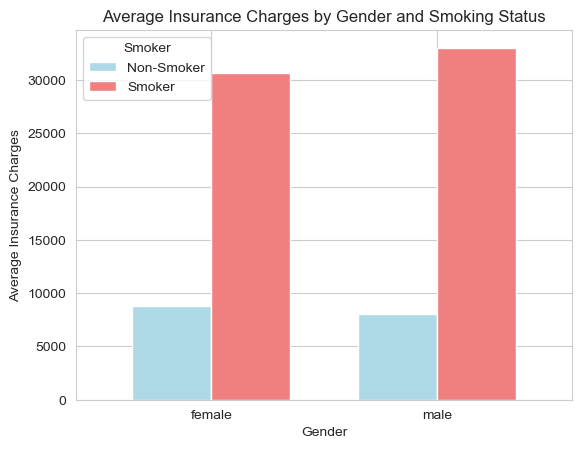

In [17]:
# Calculate average insurance charges for different combinations of gender and smoking status
avg_charges_by_gender_smoker = df.groupby(['sex', 'smoker'])['charges'].mean().unstack()

# Creating a grouped bar chart to visualize average insurance charges by gender and smoking status
plt.figure(figsize=(10, 6))
avg_charges_by_gender_smoker.plot(kind='bar', color=['lightblue', 'lightcoral'], width=0.7)
plt.xlabel('Gender')
plt.ylabel('Average Insurance Charges')
plt.title('Average Insurance Charges by Gender and Smoking Status')
plt.xticks(rotation=0)
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
plt.show()